In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
data = pd.read_csv('Churn_Modelling.csv')

In [8]:
data.shape

(10000, 14)

In [9]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
x = data[['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y = data['Exited']        

In [15]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

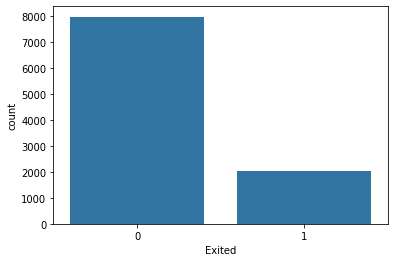

In [18]:
sns.countplot(x=y)

In [19]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [45]:
!pip install imbalanced-learn
# to balance the dataset but giving the error

In [49]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
x_res , y_res = ros.fit_resample(x,y)

ModuleNotFoundError: No module named 'imblearn'

In [48]:
#normalize
from sklearn.preprocessing import StandardScaler

In [21]:
# scaling the dataset
scaler = StandardScaler()

In [22]:
x_scaled = scaler.fit_transform(x)

In [23]:
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [26]:
#Cross -validation
x_train , x_test , y_train , y_test = train_test_split(x_scaled,y,random_state = 0)

In [27]:
x.shape

(10000, 8)

In [28]:
from sklearn.neural_network import MLPClassifier
#MLPClassifier -> multi layer perceptron

In [30]:
ann = MLPClassifier(hidden_layer_sizes = (100,100,100),random_state = 0
                   ,max_iter = 100 , activation = 'relu')
# hidden_layer_size  , activation fn

In [31]:
ann.fit(x_train , y_train)

C:\Users\Pranav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [32]:
y_pred = ann.predict(x_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report
from sklearn.metrics import accuracy_score

In [36]:
y_test.value_counts()

Exited
0    1991
1     509
Name: count, dtype: int64

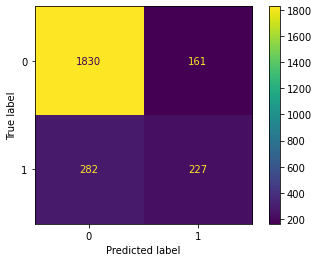

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

In [38]:
accuracy_score(y_test , y_pred)

0.8228

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1991
           1       0.59      0.45      0.51       509

    accuracy                           0.82      2500
   macro avg       0.73      0.68      0.70      2500
weighted avg       0.81      0.82      0.81      2500

